https://github.com/ahmetozlu/signature_extractor/blob/master/signature_extractor.py

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops

In [5]:
# read the input image
img = cv2.imread('example2.png', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  after removing the cwd from sys.path.


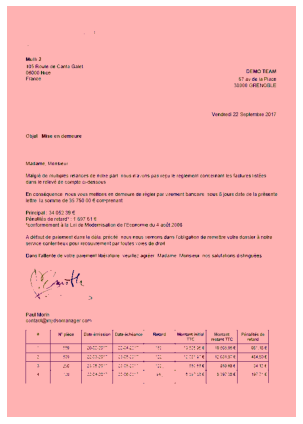

In [6]:
# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)
fig, ax = plt.subplots(figsize=(10, 6))

# plot the connected components (for debugging)
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [7]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    # print region.area # (for debugging)
    # take regions with large enough areas
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

# experimental-based ratio calculation, modify it for your cases a4_constant is used as a threshold value to remove connected pixels are smaller than a4_constant for A4 size scanned documents
a4_constant = ((average/84.0)*250.0)+100
print("a4_constant: " + str(a4_constant))

# remove the connected pixels are smaller than a4_constant
b = morphology.remove_small_objects(blobs_labels, a4_constant)
# save the the pre-version which is the image is labelled with colors as considering connected components
plt.imsave('pre_version.png', b)

# read the pre-version
img = cv2.imread('pre_version.png', 0)
# ensure binary
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save the the result
cv2.imwrite("output.png", img)

the_biggest_component: 2466
average: 21.629032258064516
a4_constant: 164.3721198156682


True